# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [54]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [7]:
data = pd.read_csv("car_data.csv")

In [8]:
data.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [10]:

data[data.isnull().any(axis=1)]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather


In [11]:
data.shape

(804, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


PART 1

In [13]:
d1=data[['Mileage','Price']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


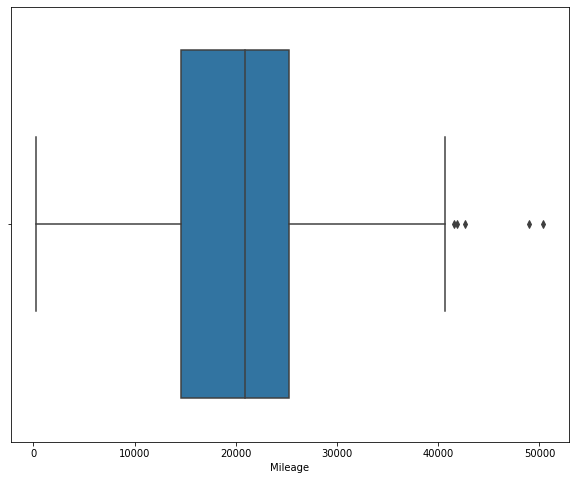

In [14]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(d1.Mileage)


OUTLIERS IN MILEAGE

In [16]:
percentile25=d1.Mileage.quantile(0.25)
percentile75=d1.Mileage.quantile(0.75)
iqr=percentile75-percentile25
upper_limit=round(percentile75+1.5*iqr)
lower_limit=round(percentile25-1.5*iqr)
print(f"upper limit is {upper_limit} \n lower limit is {lower_limit}")

upper limit is 41097 
 lower limit is -1261


In [18]:
print("Number of outliers in mileage : ",d1[d1.Mileage>=upper_limit].shape[0])

Number of outliers in mileage :  5


In [ ]:
data_without_outliers = dataset_for_part1.loc[(dataset_for_part1['Mileage'] > lower_limit) & (dataset_for_part1['Mileage'] < upper_limit)]
data_without_outliers

In [20]:
notoutlier=d1.loc[(d1['Mileage']>lower_limit)& (d1['Mileage']<upper_limit)]
notoutlier

,Mileage,Price
0,8221,17314.103129
1,9135,17542.036083
2,13196,16218.847862
3,16342,16336.913140
4,19832,16339.170324
...,...,...
799,16229,16507.070267
800,19095,16175.957604
801,20484,15731.132897
802,25979,15118.893228


In [22]:
notoutlier.describe()

,Mileage,Price
count,799.000000,799.000000
mean,19673.856070,21287.275019
std,7967.875493,9842.539866
min,266.000000,8638.930895
25%,14596.000000,14261.330129
50%,20870.000000,18004.870415
75%,25158.000000,26495.534994
max,40719.000000,70755.466717


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


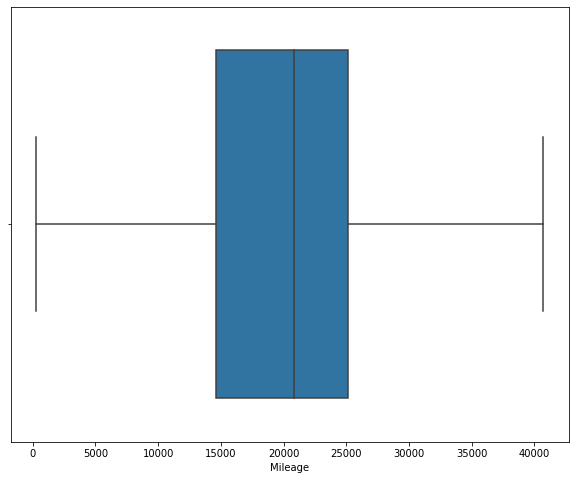

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(notoutlier.Mileage)

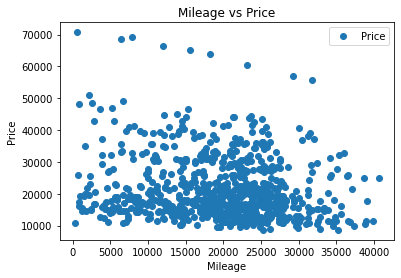

In [26]:
notoutlier.plot(x='Mileage',y='Price',style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [27]:
notoutlier.corr()

,Mileage,Price
Mileage,1.000000,-0.165933
Price,-0.165933,1.000000


In [56]:
x=notoutlier['Mileage']
x= x.to_frame()
y=notoutlier['Price']

In [57]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 30)

In [58]:
X_train.shape

(639, 1)

In [59]:
X_test.shape

(160, 1)

In [60]:
from sklearn import linear_model
linreg=linear_model.LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [61]:
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)
print('r-squared:', linreg.score(x, y))

intercept: 25319.894556059942
coefficients: [-0.20497352]
r-squared: 0.02753380505458225


In [62]:
y_pred=linreg.predict(X_test)

In [63]:
y_pred

array([23481.89699927, 24366.35773949, 24389.92969433, 20727.46283308,
       19769.8265461 , 21339.51376478, 23826.25251342, 19938.92970037,
       24434.81889528, 22026.38003141, 19919.86716298, 19738.26062397,
       21590.40135366, 23312.17892443, 20394.9957831 , 23539.28958496,
       20284.1051086 , 20978.35042196, 19157.77561439, 21744.95138799,
       21422.52804051, 22426.69331661, 25142.59246097, 20845.52758079,
       23576.18481862, 20162.14586401, 19782.53490436, 19674.1039121 ,
       21742.90165279, 19788.47913645, 20436.19546069, 23267.28972348,
       22400.66167953, 20448.28889839, 25016.53374597, 20936.33085029,
       20972.81613691, 22671.6366734 , 21697.39753128, 20192.68691854,
       21121.21696563, 20028.29815523, 19765.93204921, 20679.90897636,
       21322.91090963, 21143.76405287, 24256.28695907, 21910.56999242,
       21845.38841295, 21404.90031777, 20953.13867896, 18876.34697098,
       20935.30598269, 18895.20453485, 20643.62866326, 19688.04211149,
      

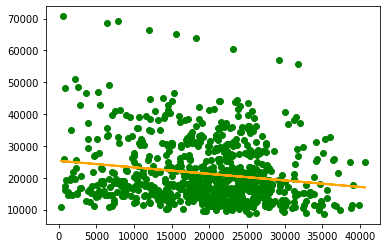

In [65]:
plt.scatter(x, y, color='green')
plt.plot(x, linreg.predict(x), color='orange', linewidth=2)

In [66]:
linreg.predict([[8000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([23680.10639342])

In [67]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.021118713745106543


Part 2

In [68]:
features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
d2=data[features]
X = d2[features]
y = data.Price
d2


,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [69]:
d2.describe()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [70]:
for i in X:
  percentile25=d2[i].quantile(0.25)
  percentile75=d2[i].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=round(percentile75+1.5*iqr)
  lower_limit=round(percentile25-1.5*iqr)
  print(f"{i} \n upper limit is {upper_limit} \n lower limit is {lower_limit}")

Mileage 
 upper limit is 41097 
 lower limit is -1261
Cylinder 
 upper limit is 9 
 lower limit is 1
Liter 
 upper limit is 6 
 lower limit is 0
Doors 
 upper limit is 4 
 lower limit is 4
Cruise 
 upper limit is 1 
 lower limit is 1
Sound 
 upper limit is 2 
 lower limit is -2
Leather 
 upper limit is 2 
 lower limit is -2


In [71]:
X = d2[features]
y = data.Price

In [72]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 30)

from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],columns=['Coefficients'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficients
Mileage,-1661.044065
Cylinder,5220.545797
Liter,-946.726507
Doors,-1185.252532
Cruise,2816.539386
Sound,-918.341751
Leather,1685.916881


In [74]:
regressor.intercept_ 

21451.07890200263

In [75]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
200,10813.343521,25184.625951
128,31181.715159,32309.408796
599,12209.559623,13636.692269
398,16143.957292,23718.519746
71,26060.335350,23144.302034
...,...,...
85,43892.467880,31952.166644
165,10386.040218,10363.695370
67,23077.565910,25998.350865
767,15194.975354,15582.447578


In [77]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.45249864349981517


In [78]:
def plotting_with_one_feature():
    for i in ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'):
      data.groupby(data[i])['Price'].mean().plot()
      #plt.title(i,' vs Price')
      plt.xlabel(i)
      plt.ylabel('price')
      plt.show()
      print(data[[i,'Price']].corr())

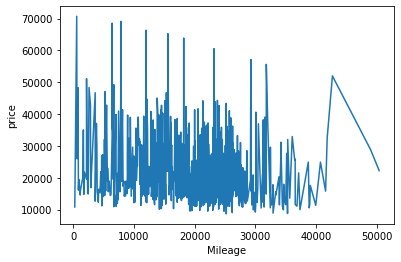

          Mileage     Price
Mileage  1.000000 -0.143051
Price   -0.143051  1.000000


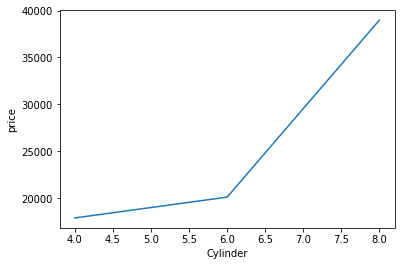

          Cylinder     Price
Cylinder  1.000000  0.569086
Price     0.569086  1.000000


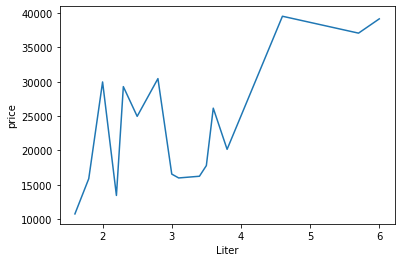

          Liter     Price
Liter  1.000000  0.558146
Price  0.558146  1.000000


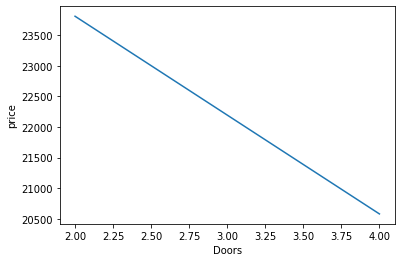

         Doors    Price
Doors  1.00000 -0.13875
Price -0.13875  1.00000


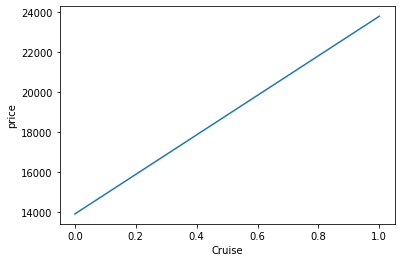

          Cruise     Price
Cruise  1.000000  0.430851
Price   0.430851  1.000000


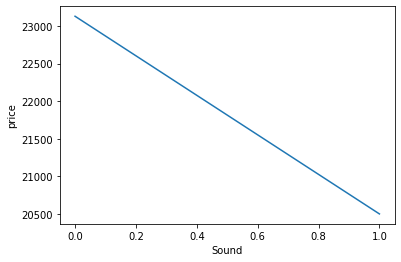

          Sound     Price
Sound  1.000000 -0.124348
Price -0.124348  1.000000


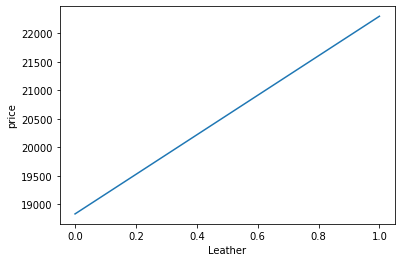

          Leather     Price
Leather  1.000000  0.157197
Price    0.157197  1.000000


In [79]:
plotting_with_one_feature()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


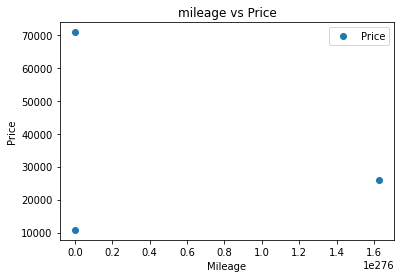

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [80]:
data['transformed'] = np.exp(data['Mileage'])
data.plot(x='transformed', y='Price', style='o')
plt.title('mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
data[['Mileage','Price']].corr()

1) There is no linear relationship between Mileage and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature 2)There is a linear relationship between cylinder and price =>so we can go ahead and develop a linear regression model. No transformation required. 3)There is a linear relationship between liter and price =>so we can go ahead and develop a linear regression model. No transformation required. 4)There is no linear relationship between doors and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature 5)There is a linear relationship between cruise and price =>so we can go ahead and develop a linear regression model. No transformation required. 6)There is no linear relationship between Mileage and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature 7)There is no linear relationship between sound and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature There is no linear relationship between leather and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature

In [82]:
feature = ['Cylinder', 'Liter', 'Cruise']
x=data[feature]
y=data['Price']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [85]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [86]:
#coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise'],columns=['Coefficients'])
y_pred = regressor.predict(X_test_scaled)
#coeff_df
y_pred

array([10067.90359486, 13784.24463885, 22542.85757354, 27322.45539486,
       11941.5450945 , 17619.00337179, 20328.55270936, 22691.33163075,
       26647.05468628, 19775.81624604, 17828.03305338, 11617.18066106,
       24262.72228615, 25683.19460815, 15074.2437285 , 10686.69813245,
       23965.95250493, 29759.14475306, 13273.4201143 , 14196.04362649,
       20065.78113955, 24874.10844893, 21604.29251219, 14795.21173775,
       24474.71152207, 17247.75967889, 36104.94597593, 13623.58155269,
       19626.97937565, 19168.81252745, 22008.38408531, 20601.43222825,
       26546.63282525, 29089.48305219, 19051.62307259, 34082.78499886,
       24019.76645617, 23182.52514218, 31103.77773232, 12613.92521634,
       13651.31767354, 30231.35303686, 17465.34271833, 18955.78909203,
       16497.71708808, 30535.25762116,  6766.02752266, 32746.63118845,
       10603.70572584, 11836.1412739 , 24563.96959887, 23354.43756105,
       22903.8378482 , 22883.45570814, 33174.99940211, 12444.49996222,
      

In [87]:
regressor.intercept_ 

21375.24485351278

In [88]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.40425283766353604


Task Hard 

In [89]:
dummies = pd.get_dummies(data[['Make','Model','Trim','Type']])
dummies

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
merged = pd.concat([data,dummies],axis='columns')
merged

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,0,0,0,0,0,0,0,0,1,0


In [91]:
final = merged.drop(['Make','Model','Trim','Type'],axis='columns')
final

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,transformed,Make_Buick,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,inf,1,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,inf,1,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,inf,1,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,inf,1,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,inf,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,inf,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,inf,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,inf,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,inf,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
X = final.drop('Price',axis='columns')
X

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,transformed,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,8221,6,3.1,4,1,1,1,inf,1,0,...,0,0,1,0,0,0,0,0,1,0
1,9135,6,3.1,4,1,1,0,inf,1,0,...,0,0,1,0,0,0,0,0,1,0
2,13196,6,3.1,4,1,1,0,inf,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16342,6,3.1,4,1,0,0,inf,1,0,...,0,0,1,0,0,0,0,0,1,0
4,19832,6,3.1,4,1,0,1,inf,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0,inf,0,0,...,0,0,0,0,0,0,0,0,1,0
800,19095,6,3.0,4,1,1,0,inf,0,0,...,0,0,0,0,0,0,0,0,1,0
801,20484,6,3.0,4,1,1,0,inf,0,0,...,0,0,0,0,0,0,0,0,1,0
802,25979,6,3.0,4,1,1,0,inf,0,0,...,0,0,0,0,0,0,0,0,1,0


In [93]:
y = final['Price']
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [95]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=200)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [96]:
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [97]:
y_predict = regressor.predict(X_test_scaled)
print("r^2 Score :", metrics.r2_score(y_test,y_predict))

r^2 Score : 0.3762559217338842


2. Find the best combination of factors to predict price

In [98]:

dff = pd.read_csv('car_data.csv')
to_encode = ['Make','Model','Type','Trim']

In [99]:
def combinations(Ft):
  if Ft:
    result = combinations(Ft[:-1])
    return result + [i+[Ft[-1]] for i in result]
  else:
    return [[]]
comb = combinations(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather','Make','Model','Trim','Type'])
comb = comb[1:]
print(comb)

[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [100]:
R2_Score = []
for i in comb:
  X = dff[i]
  y = dff['Price'].values
  X = pd.get_dummies(X,columns=[j for j in to_encode if j in X.columns])
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

  if 'Mileage' in X_train:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train_scaled,y_train)
  y_predict = regressor.predict(X_test_scaled)
  R2_Score.append(metrics.r2_score(y_test,y_predict))

In [101]:
dff_snew = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2_Score})
dff_snew

,Feature Combination,R2 Score
0,[Mileage],0.039431
1,[Cylinder],0.039431
2,"[Mileage, Cylinder]",0.298457
3,[Liter],0.298457
4,"[Mileage, Liter]",0.309513
...,...,...
2042,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.991644
2043,"[Liter, Doors, Cruise, Sound, Leather, Make, M...",0.991644
2044,"[Mileage, Liter, Doors, Cruise, Sound, Leather...",0.991542
2045,"[Cylinder, Liter, Doors, Cruise, Sound, Leathe...",0.991542


In [102]:
dff_snew['R2 Score'].max()

0.9921621787561907

In [115]:
dff_snew['Feature Combination'][dff_snew['R2 Score'].argmax()]


['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']

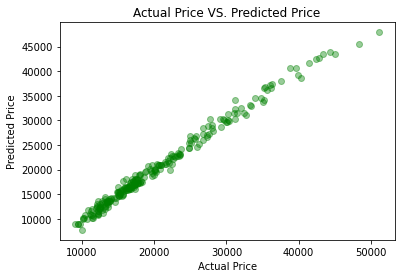

In [117]:
# Vizulaizing Actual & Predicted Price for the  best combination of factors ['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type'] to predict price

X = data[['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']]
y = data['Price'].values
X = pd.get_dummies(X,columns=[j for j in to_encode if j in X.columns])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)

plt.scatter(y_test,y_predict,color="Green",alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS. Predicted Price")
plt.show()

'Mileage', 'Cylinder', 'Leather', 'Make', 'Model' ,'Trim', 'Type' are the best combination of the factors that is the best predictor for price.

There may be theoretical or practical reasons to believe that higher mileage causes higher prices, but our model show that there is an association. Since the R2 value of "Mileage Vs. Price" indicates that mileage does not explain much of the variability in price prediction.

However,in multi-variable datasets, it is possible to obtain seemingly conflicting results which indicate that mileage is significant predictor of price.